

# Assignments Week II.<br><br>Superposition Principle and Convolution

<hr style="height:1px; border:none; background-color:blue;">

### Useful Information

**In this notebook you will be working on the mandatory assignments for week two of Signal Processing**. In order to complete the notebook you must complete all of the necessary code blocks (labelled with "Write your code here"), and fill in all answer blocks. Each section of the notebook will state the completion criteria, which summarize everything you need to do to complete that section. **If you are stuck on a section in this notebook, it may be beneficial to check the non-mandatory exercises for this week, since they may have content that can help you!**

Mandatory assignments are pass or fail. **If your notebook is incomplete - meaning you did not complete the task required or answer the necessary questions - then you will automatically fail.** So once you finish this notebook, please look through it to make sure you've answered everything!

<hr style="height:1px; border:none; background-color:blue;">

### Objectives
- Work with input-output relations of an LTI system and convolution.
- Determine the impulse response of a black-box filter.
- Remove degraded noise from a speech signal using a filter.

<hr style="height:3px; border:none; background-color:blue;">

<h3 style="color:blue;"> <u>Imports for Exercises and Assignments </u></h3> 

Run the code below to import modules that will be used throughout the rest of this notebook.

<br>

In [2]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys
sys.path.insert(0, './data')

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT II.1 ---------------------------------------------------------------------------------------->
<div>
<h3 style="color:blue;"> <u>Python Hands-on Assignment II.1: Determine unknown impulse response</u></h3>  
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assignment.</b>
<ul>
<li>Show the plots of the impulse response of each of the six LTI filters.</li>
<li>Explain your solution in one sentence.</li>
</ul>
<hr>
</div>

You are given six LTI filters with an unknown input-output relation. Each of the "black-box" filters can be called through the following function:

> `yy = bb.blackbox(xx, option);`

where  `xx` is an input signal, `option` is an integer between 1 and 6 that selects an LTI filter, and  `yy` is the resulting output signal. **For each of the six LTI filters, determine and plot the impulse response.**

</div>
<br>

In [2]:
# Import blackbox module
from data import blackbox as bb

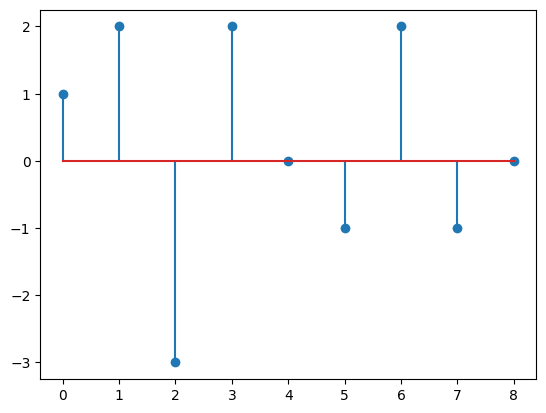

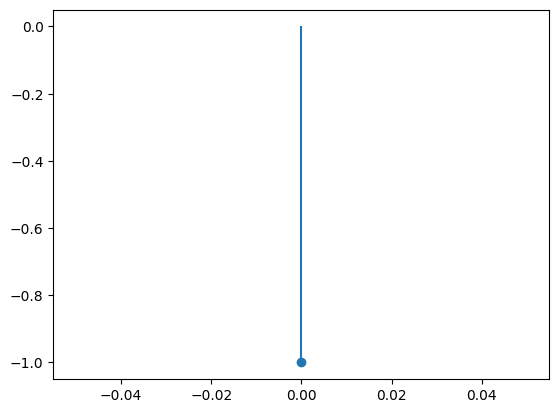

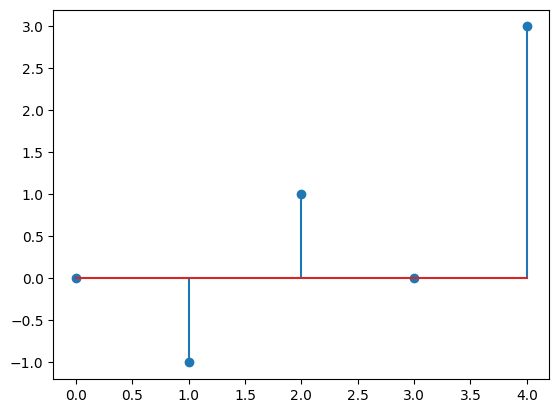

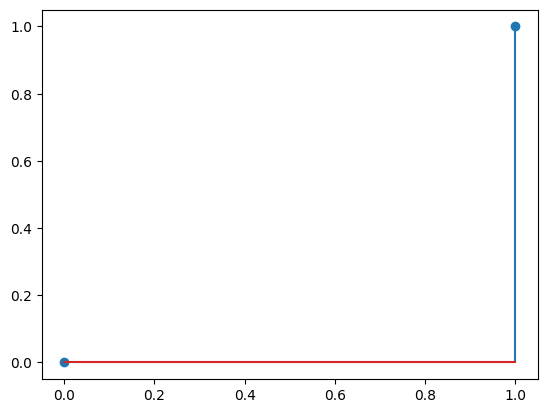

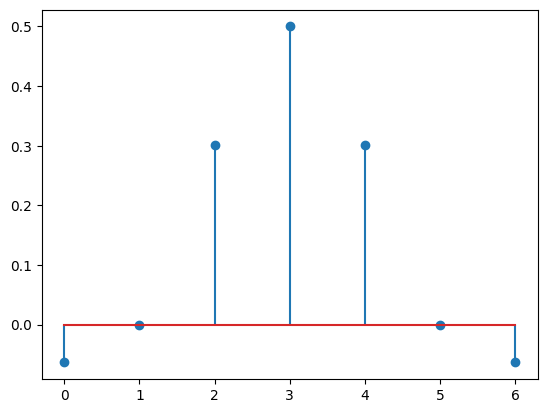

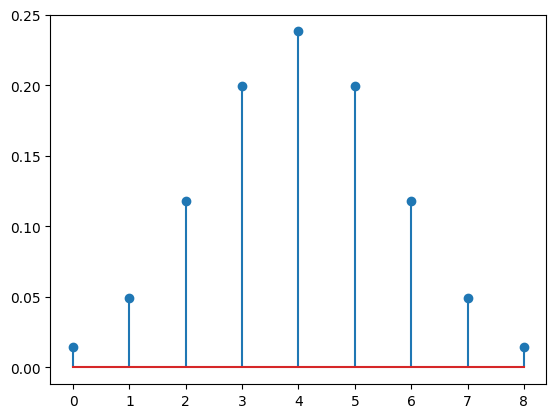

In [10]:
xx = [1]

for option in range(1, 7):
    yy = bb.blackbox(xx, option)
    plt.stem(yy)
    plt.show()

<br>
<b>Explain your solution for finding the impulse responses in one sentence.</b>
<br><br>

<div class="alert alert-block alert-success">
    Pass a unit impulse (one 1, otherwise 0) as input through the respective filter and plot the output yy with plt.stem(yy)
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT II.2 ---------------------------------------------------------------------------------------->
<div>
<h3 style="color:blue;"> <u>Python Hands-on Assignment II.2: Improving quality of speech signal</u></h3>  

<br>
<div style="background-color:#c2eafa">
    <br>
    <b>Completion requirements for this assignment.</b>
    <ul>
        <li> Analyze how different FIR filters impact the quality of a speech signal.
        <li> Create your own FIR filter to improve the coherence of the speech signal.</li>
        <li> Explain how your filter improves on the results of other filters.</li>
    </ul>
<hr>
</div>

You are given the speech signal `data/code.wav`. This speech signal is a degraded recording of a sentence. The objective is to improve the intelligibility of the speech, in particular to understand the numerical code expressed in the signal.

**Run the code below to read the speech signal into the notebook and listen to the signal that is displayed. What is the numerical code pronounced?**
</div>
<br>

In [4]:
# Read the .wav file into the notebook, with sample rate fs and signal xx
(fs, xx) = wv.read("data/code.wav")
display(Audio(xx, rate=fs))

<div class="alert alert-block alert-success">
    1201
</div>

<br>
<div> 
We wish to improve the quality of the speech signal as so to better understand the numerical code. To that end, we consider various FIR filters. The first four filters (FIR1 to FIR4) are similar to the ones studied before during the class room lectures and in Session I and II of the lab. The filter FIR5 has been specifically designed for this task of improving speech quality.
<hr></div>

| Filter | h[0]  | h[1] | h[2] | h[3] | h[4] | h[5] | h[6] | h[7] | h[8] | h[9] | h[10] | h[11] | h[12] | h[13] | h[14] | h[15] | h[16] | h[17] | h[18] | h[19] | h[20] |
| ------ | ----- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
|  FIR1  | 0.5   |  0.5 |
|  FIR2  | 0.125 | 0.125| 0.125| 0.125| 0.125| 0.125|
|  FIR3  | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 | 0.1 |
|  FIR4  | 0.5 | -0.5 |
|  FIR5  | 0.0095 | 0.0015 | -0.0174 | -0.0118 | 0.0276 | 0.0333 | -0.0393 | -0.0857 | 0.0466 | 0.3105 | 0.4497 | 0.3105 | 0.0466 | -0.0857 | -0.0393 | 0.0333 | 0.0276 | -0.0118 | -0.0174 | 0.0015 | 0.0095 |

<div><hr>
<b>Filter the speech signal with each of these FIR filters using the convolution function np.convolve().</b>
</div>
<br>

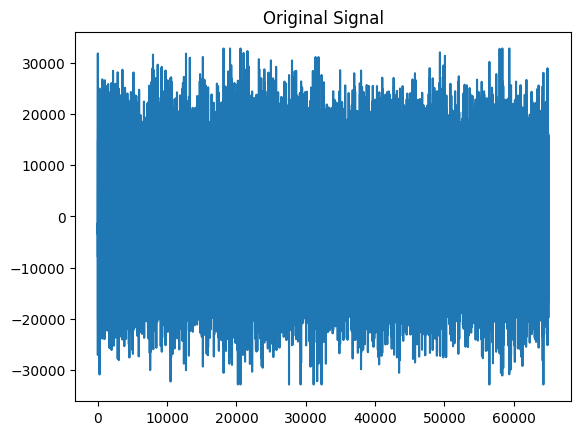

var: 79.21235995916099


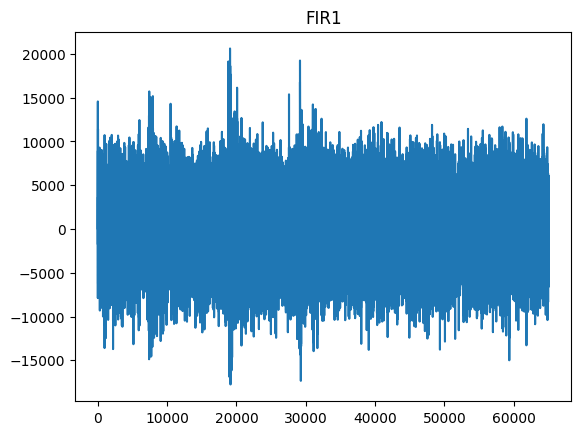

var: 13.872545804081971


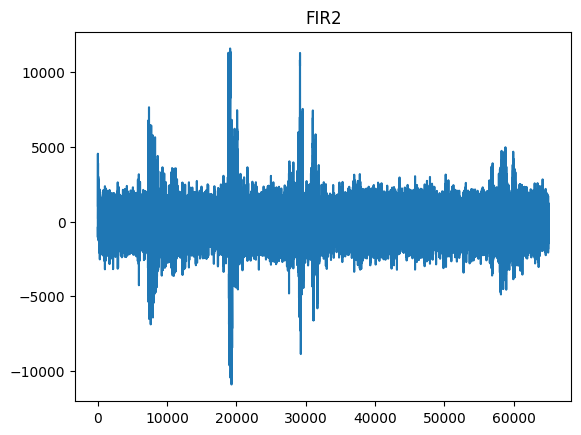

var: 1.5564272909916954


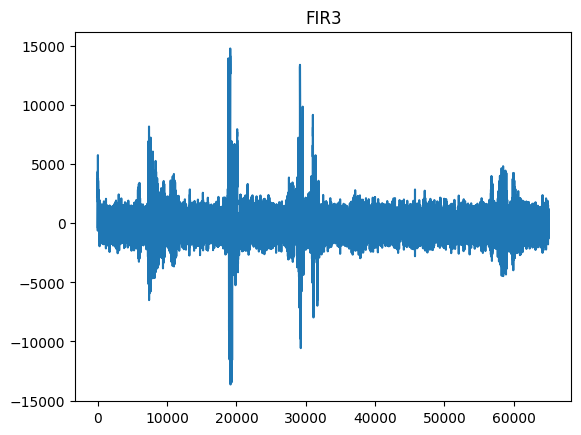

var: 1.835301754840781


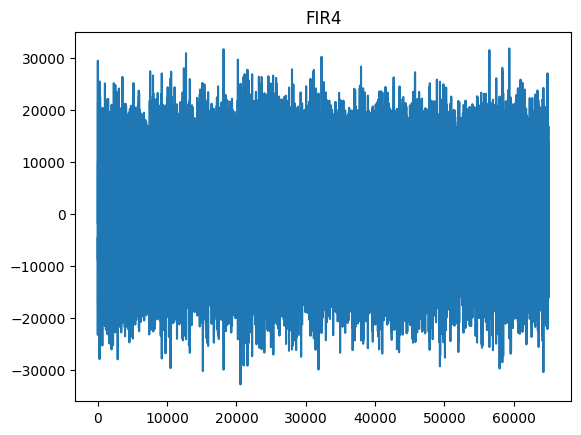

var: 65.33859629167243


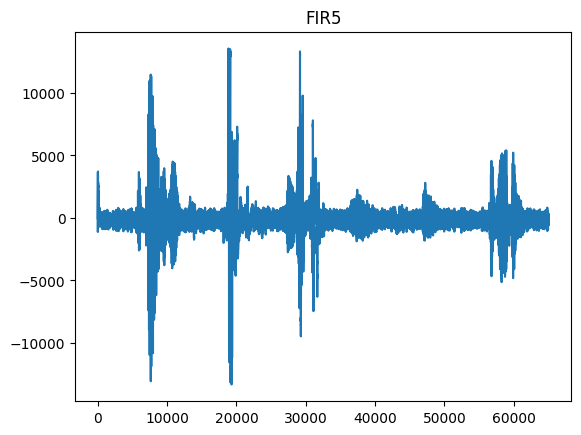

var: 1.7883980938791184


In [15]:
(fs, xx) = wv.read("data/code.wav")

plt.plot(xx)
plt.title("Original Signal")
plt.show()

display(Audio(xx, rate=fs))
print(f"var: {np.var(xx) / 1_000_000}")

hh = [
    [0.5, 0.5],
    [0.125 for _ in range(6)],
    [0.1 for _ in range(10)],
    [0.5, -0.5],
    [float(s) for s in "0.0095 | 0.0015 | -0.0174 | -0.0118 | 0.0276 | 0.0333 | -0.0393 | -0.0857 | 0.0466 | 0.3105 | 0.4497 | 0.3105 | 0.0466 | -0.0857 | -0.0393 | 0.0333 | 0.0276 | -0.0118 | -0.0174 | 0.0015 | 0.0095".split(" | ")],
]

for i, h in enumerate(hh):
    yy = np.convolve(xx, h)

    plt.plot(yy)
    plt.title(f"FIR{i+1}")
    plt.show()

    print(f"var: {np.var(yy) / 1_000_000}")
    display(Audio(yy, rate=fs))


<br>
<div>
    <b>Use your results to answer <i>all</i> of the following question:</b> Listen to the different output signals and for each signal state in one sentence how the filter impacts it. Which filter gives the best result? Which one gives the worst result? What is the numerical code?
</div>
<br>

<div class="alert alert-block alert-success">
    <p> Ranking </p>
    <ol>
        <li>FIR5 (BEST) - filters out surrounding noise and only keeps the signal related to human speech + reduces signal </li>
        <li>FIR3 - similar to FIR5 but is less effective in reducing the surrounding noise, but still maintains voice</li>
        <li>FIR2 - similar to FIR5 and FIR3, but again a bit less effective -> more noise present</li>
        <li>FIR1 - reduces noise very slightly </li>
        <li>FIR4 (WORST) - very little difference noticed compared to raw signal</li>
    </ol>
</div>


<br>
<div>
<b>Create another FIR filter yourself and try to improve the best result  obtained so far. Write down the impulse response of the filter you selected and explain how it improves upon the other filters.</b>
</div>
<br>

In [24]:
def get_xy_diff(xx, combination):
    xy_dif = np.zeros(xx.shape[0])
    for i in range(1, xx.shape[0]):
        diff_sum = xx[i]
        for j in range(len(combination)):
            diff_sum += xx[i - j - 1] * combination[j]
        xy_dif[i] = diff_sum
    return  xy_dif

def variance_minimizer(xx, max_h, n):
    from itertools import product

    min_var = float("inf")
    best_combination = None
    for h in range(1, max_h + 1):
        test_b = np.linspace(-1.5, 1.5, n).tolist()
        combinations = product(test_b, repeat=h)
        for combination in combinations:
            xy_dif = get_xy_diff(xx, combination)
            diff_var = np.var(xy_dif)
            if diff_var  < min_var:
                if any(combination):
                    min_var = diff_var
                    best_combination = combination
    return best_combination, min_var

In [27]:
best, min_var = variance_minimizer(xx, max_h=2, n=8)
print(f"Best combination: ({best}) with variance of delta(x) of {min_var / 10  ** 6} * 10^6")

Best combination: ((1.0714285714285712, 0.6428571428571428)) with variance of delta(x) of 32.93691753708348 * 10^6


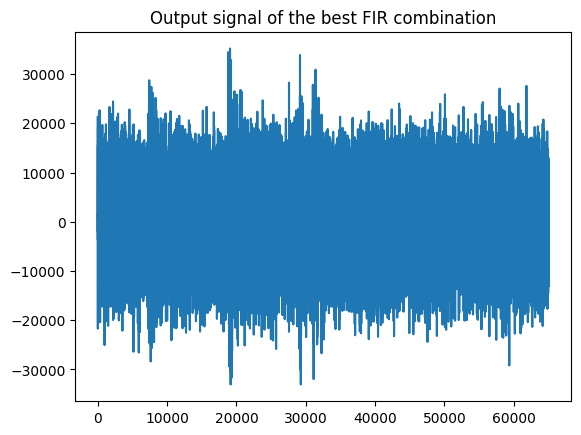

52.76926453903785
374.66562642857133


In [28]:
yy = np.convolve(xx, best)
display(Audio(yy, rate=fs))

plt.plot(yy)
plt.title('Output signal of the best FIR combination')
plt.show()

print(np.var(yy) / 10**6)
print(np.sum(np.abs(yy)) / 10**6)

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT II.3 ---------------------------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u>Python Hands-on Assignment II.3:  Differential compression of audio</u></h3>  

<br>
<div style="background-color:#c2eafa">
<br>
    <b>Completion requirements for this assignment.</b>
    <ul>
        <li>Reproduce the plot shown in the lecture 1 of $b_1$ versus the variance of $\Delta x[n]$.</li>
        <li>Show the 2-D plot of $b_1$ and $b_2$ versus the variance of $\Delta x[n]$.</li>
        <li>Show and explain your python code leading to both plots.</li>
    </ul>
<hr>
</div>

We continue the example given in lecture 1 of compressing an audio signal using a differential technique. The idea was that each audio sample can be predicted from previous samples. The simplest predication was to take a weighted version of the value of the previous sample (that is: $b_1x[n-1]$) as an estimate for the current sample $x[n]$. If we denote the estimate/predication by $y[n]$, then the estimate is a simple first order FIR filter:

\begin{equation}
    \mbox{Estimate} \Rightarrow y[n] = b_1x[n-1].
\end{equation}    

and the remaining difference is:

\begin{equation}
   \Delta x[n] = x[n] - y[n] = x[n] - b_1x[n-1]
\end{equation} 

Note that this is a second order FIR filter by itself.

The best value of $b_1$ minimizes the variance of the difference $\Delta x[n]$. In the lecture, a plot was shown that illustrates how this variance changes as we change $b_1$.

<b>Read the music file `data/summervibe.wav` into the notebook. Reproduce the plot shown in lecture 1 to find the optimal value of $b_1$.</b><br><br>

</div>

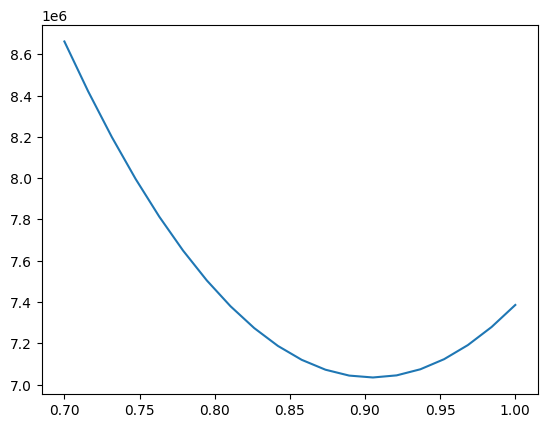

In [9]:
(_, xx) = wv.read("data/summervibe.wav")
x = np.asarray(xx)
b = np.linspace(0.7, 1, 20)

# truncate, otherwise shape mismatch when calculating dx
# why: x minus delayed_x_by_n will not use the last n values, as delayed_x_by_n has n new values (zeros) that are not present in x
delayed_x_by_1 = np.pad(x, (1, 0))[:-1] 

# scale delayed_x_by_1 by each b, so that for each b there's a row
# b[:, None] converts to a column vector of shape (1, N), i.e. [b_1, b_2, ...] to [ [b_1], [b_2], ... ]
# upon multiplication, this then is broadcast to [ [b_1, b_1, ...], [b_2, b_2, ...], ... ] and multiplication becomes element-wise
y = delayed_x_by_1* b[:, None]

dx = x - y
variances = np.var(dx, axis=1)

plt.plot(b, variances)
plt.show()

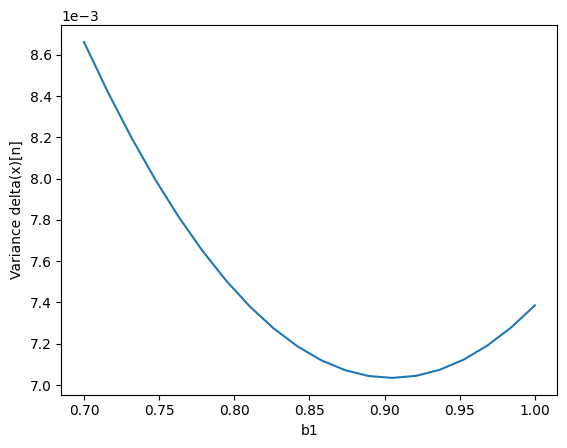

In [8]:
def apply(xx, b):
    xx = np.array(xx)
    yy = np.zeros(xx.shape[0])
    for i in range(1, xx.shape[0]):
        yy[i] = b * xx[i - 1]
    return yy, xx - yy

(fs, xx) = wv.read("data/summervibe.wav")

b_list = np.linspace(0.7, 1, 20)
b_var = np.zeros(b_list.shape[0])
for i, b in enumerate(b_list):
    yy, xy_diff = apply(xx, b)
    b_var[i] = np.var(xy_diff)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(b_list, b_var / 10 ** 9)
plt.ylabel('Variance delta(x)[n]')
plt.xlabel('b1')
plt.show()

<br>
<div>
    <b>State what the optimal value of $b_1$ is and explain how your code leads to your answer.</b>
</div>
<br>

<div class="alert alert-block alert-success">
    The optimal value of b1 is around 0.9, as that's where there's least variance (see graph). The code calculates delta x at each b, and plots the variance.
</div>

<div>  <br>
There is no reason to limit ourselves to using only the value $x[n-1]$ immediately preceding $x[n]$. We can also use the two preceding values, in which case the estimate is created by a second  order FIR filter:

\begin{equation}
    \mbox{Estimate} \Rightarrow y[n] = b_1x[n-1] + b_2x[n-2].
\end{equation}    

The remaining difference now becomes:

\begin{equation}
   \Delta x[n] = x[n] - y[n] = x[n] - b_1x[n-1] - b_2x[n-2].
\end{equation} 

<b>Write a program to determine the optimal values for the pair ($b_1$, $b_2$) such that the variance of the difference is minimized. Illustrate the result by making a 2-D surface plot of the variance of the difference $\Delta x[n]$ as a function of the values ($b_1$, $b_2$).</b>
    
You may want to use the python command `Axes3D.plot_surface` to plot the 3D figure. You also may need to use `np.meshgrid` when plotting the 3D surface.
    
<span style="font-size: 20px">ℹ️</span> <i> It is important to note that the surface plot provides a relationship between two independent variables that are `X` and `Z` and a designated dependent variable that is `Y`, rather than just showing the individual data points. That means that the parameters `X` and `Z` of the function should correspond to the pair ($b_1$, $b_2$), and the `Y` variable of the function should correspond to the computed variance of that pair</i>
<br><br>
</div>

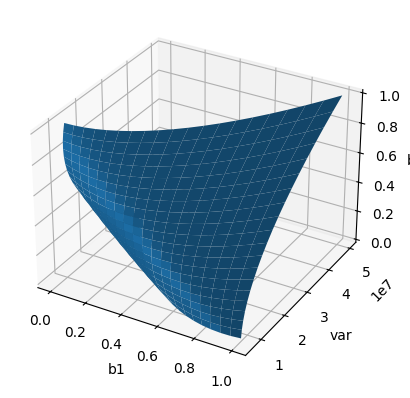

In [8]:
from mpl_toolkits.mplot3d import Axes3D

(_, x) = wv.read("data/summervibe.wav")
x = np.asarray(x)

# b_n[x, y] is the b_n at (x, y) in the plot
b_1, b_2 = np.meshgrid(
    np.linspace(0, 1, 20),
    np.linspace(0, 1, 20)
)

x_delayed_by_1 = np.pad(x, (1, 0))[:-1] 
x_delayed_by_2 = np.pad(x, (2, 0))[:-2] 

y = b_1[:, :, None] * x_delayed_by_1 + b_2[:, :, None] * x_delayed_by_2

dx = x - y
variances = np.var(dx, axis=2)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(b_1, variances, b_2)
ax.set_xlabel("b1")
ax.set_ylabel("var")
ax.set_zlabel("b2")

plt.show()


<br>
<div>
    <b>State what the optimal value of ($b_1$, $b_2$) is and explain how your code leads to your answer.</b>
</div>
<br>

<div class="alert alert-block alert-success">
    <b>Your answer goes here.</b>
</div>

In [ ]:
"""
def get_xy_diff(xx, b1, b2):
    xy_dif = np.zeros(xx.shape[0])
    for i in range(1, xx.shape[0]):
        xy_dif[i] = xx[i] + b1 * xx[i - 1] + b2 * xx[i - 2]
    return xy_dif


def variance_minimizer(xx, n):
    from itertools import product

    min_var = float("inf")
    best_combination = None

    b_arr = []
    var_arr = []
    test_b = np.linspace(-1.5, 1.5, n).tolist()
    combinations = product(test_b, repeat=2)
    for b1, b2 in combinations:
        xy_dif = get_xy_diff(xx, b1, b2)
        diff_var = np.var(xy_dif)
        b_arr.append((b1, b2))
        var_arr.append(diff_var)
        if diff_var < min_var:
            if any((b1, b2)):
                min_var = diff_var
                best_combination = (b1, b2)
    return best_combination, min_var, b_arr, var_arr


best, min_var, b_arr, var_arr = variance_minimizer(xx, n=30)
b1 = np.unique(np.array([bs[0] for bs in b_arr]))
b2 = np.unique(np.array([bs[1] for bs in b_arr]))
var_arr = np.array(var_arr)

X, Y = np.meshgrid(b1, b2)
Z = np.reshape(var_arr, (b1.shape[0], b2.shape[0]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z)
plt.show()
"""

<hr style="height:3px; border:none; background-color:blue;">